<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------

Set:

$x = \beta \sin\theta \cos\phi$,  
$y = \beta \sin\theta \sin\phi$,  
$z = c \cos\theta$,  

where $0 \leq \theta \leq \pi$ and $0 \leq \phi < 2\pi$.

The surface area element $dA$ in these coordinates is given by $dA = \sqrt{E G - F^2} \, d\theta \, d\phi$

$E = (\beta^2 \sin^2\theta \cos^2\phi + \beta^2 \sin^2\theta \sin^2\phi + c^2 \cos^2\theta)$,  
$F = 0$,  
$G = (\beta^2 \cos^2\theta)$.

Therefore, the integral for the surface area $A$ becomes:

$$
A = \int_{0}^{2\pi} \int_{0}^{\pi} \sqrt{EG - F^2} \, d\theta \, d\phi
$$

$$
= \int_{0}^{2\pi} \int_{0}^{\pi} \sqrt{(\beta^2 \sin^2\theta \cos^2\phi + \beta^2 \sin^2\theta \sin^2\phi + c^2 \cos^2\theta)(\beta^2 \cos^2\theta)} \, d\theta \, d\phi
$$




-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


/tmp/ipykernel_2666/3982087863.py:100: RuntimeWarning: invalid value encountered in sqrt
  e = np.sqrt(1 - beta**2 / c**2)


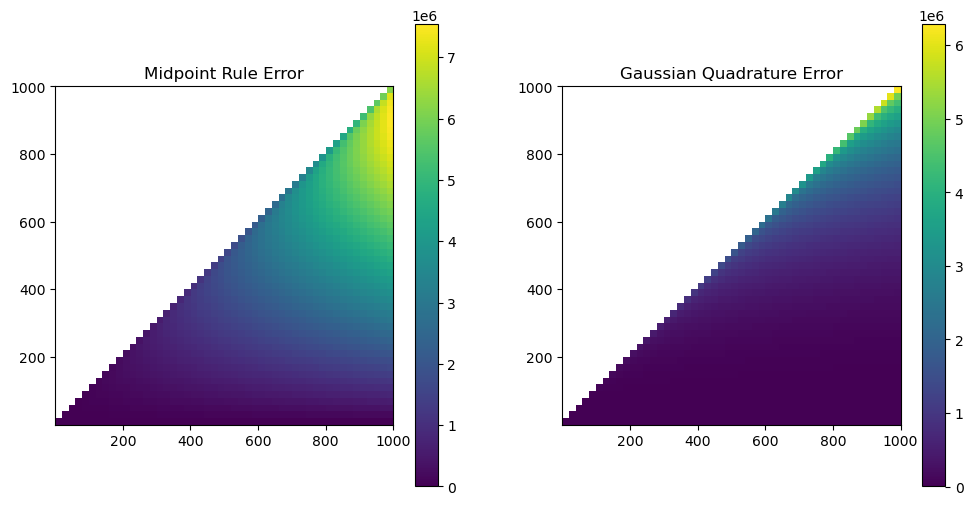

'--------------------Write your code above this line------------------------------'

In [7]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad
from numpy import arcsin as asin

class Quad_:

    def __init__(self, fuc, N, a, b):
        '''The class Quad takes four inputs: 
            fuc: a function input,
            N: number of grid points,
            a,b: left and right points'''
        self.f = fuc
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N
    def midpoint(self):
        """midpoint rule."""
        x = np.linspace(self.a + 0.5*self.h, self.b - 0.5*self.h, self.N)
        return np.sum(self.f(x)) * self.h

    def trapezoidal(self):
        """trapezoidal rule."""
        x = np.linspace(self.a, self.b, self.N+1)
        y = self.f(x)
        return self.h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

    def simpsons(self):
        """Simpson's rule."""
        if self.N % 2 == 1:
            raise ValueError("N must be even for Simpson's Rule.")
        x = np.linspace(self.a, self.b, self.N+1)
        y = self.f(x)
        return self.h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
   
    def midpoint_2(self):
        """Midpoint rule."""
        sum_midpoint = 0
        for i in range(self.N):
            x_i = self.a + (i + 0.5) * self.h
            sum_midpoint += self.f(x_i)
        return self.h * sum_midpoint

    def trapezoidal_2(self):
        """Trapezoidal rule."""
        sum_trapezoidal = 0
        sum_trapezoidal += self.f(self.a) + self.f(self.b)
        for i in range(1, self.N):
            x_i = self.a + i * self.h
            sum_trapezoidal += 2 * self.f(x_i)
        return (self.h / 2) * sum_trapezoidal

    def simpsons_2(self):
        """Simpson's rule."""
        if self.N % 2 == 1:
            raise ValueError("N must be even for Simpson's Rule.")
        
        sum_simpson = self.f(self.a) + self.f(self.b)
        sum_odd = 0
        sum_even = 0
        for i in range(1, self.N):
            x_i = self.a + i * self.h
            if i % 2 == 0:
                sum_even += self.f(x_i)
            else:
                sum_odd += self.f(x_i)
        sum_simpson += 4 * sum_odd + 2 * sum_even
        return (self.h / 3) * sum_simpson
class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        super().__init__(fuc, N, a, b)  
        self.order = order

    def gaussian(self):
        """Gaussian quadrature."""
        result, _ = fixed_quad(self.f, self.a, self.b, n=self.order)
        return result
def integrand(theta, phi, beta, c):
    dx_dtheta = beta * np.cos(theta) * np.cos(phi)
    dy_dtheta = beta * np.cos(theta) * np.sin(phi)
    dz_dtheta = -c * np.sin(theta)

    dx_dphi = -beta * np.sin(theta) * np.sin(phi)
    dy_dphi = beta * np.sin(theta) * np.cos(phi)
    dz_dphi = 0

    E = dx_dtheta**2 + dy_dtheta**2 + dz_dtheta**2
    F = dx_dtheta * dx_dphi + dy_dtheta * dy_dphi + dz_dtheta * dz_dphi
    G = dx_dphi**2 + dy_dphi**2 + dz_dphi**2

    return np.sqrt(E * G - F**2)

def theoretical_area(beta, c):
    e = np.sqrt(1 - beta**2 / c**2)
    return 2 * np.pi * beta**2 * (1 + (c / beta) * asin(e))

def midpoint_rule(beta, c, N):
    def integrand_fixed_theta(theta):
        return Quad_(lambda phi: integrand(theta, phi, beta, c), N, 0, 2 * np.pi).midpoint()
    return Quad_(integrand_fixed_theta, N, 0, np.pi).midpoint()

def gaussian_quadrature(beta, c, N):
    def integrand_fixed_theta(theta):
        return Gauss_Quad_(lambda phi: integrand(theta, phi, beta, c), N, 0, 2 * np.pi, order=5).gaussian()
    return Gauss_Quad_(integrand_fixed_theta, N, 0, np.pi, order=5).gaussian()


beta_values = np.linspace(0.001, 1000, num=50)
c_values = np.linspace(0.001, 1000, num=50)

errors_midpoint = np.zeros((len(beta_values), len(c_values)))
errors_gaussian = np.zeros((len(beta_values), len(c_values)))

for i, beta in enumerate(beta_values):
    for j, c in enumerate(c_values):
        approx_midpoint = midpoint_rule(beta, c, N=100) # Example N value
        approx_gaussian = gaussian_quadrature(beta, c, N=100) # Example N value
        exact_area = theoretical_area(beta, c)
        errors_midpoint[i, j] = np.abs(approx_midpoint - exact_area)
        errors_gaussian[i, j] = np.abs(approx_gaussian - exact_area)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(errors_midpoint, extent=[0.001, 1000, 0.001, 1000], origin='lower')
plt.title('Midpoint Rule Error')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(errors_gaussian, extent=[0.001, 1000, 0.001, 1000], origin='lower')
plt.title('Gaussian Quadrature Error')
plt.colorbar()
plt.show()
'''--------------------Write your code above this line------------------------------'''

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



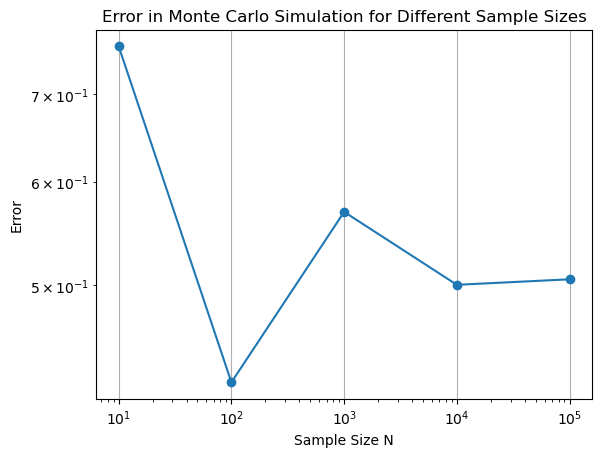

'--------------------Write your code above this line------------------------------'

In [10]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def integrand(theta, phi, beta, c):
    dx_dtheta = beta * np.cos(theta) * np.cos(phi)
    dy_dtheta = beta * np.cos(theta) * np.sin(phi)
    dz_dtheta = -c * np.sin(theta)

    dx_dphi = -beta * np.sin(theta) * np.sin(phi)
    dy_dphi = beta * np.sin(theta) * np.cos(phi)
    dz_dphi = 0

    E = dx_dtheta**2 + dy_dtheta**2 + dz_dtheta**2
    F = dx_dtheta * dx_dphi + dy_dtheta * dy_dphi + dz_dtheta * dz_dphi
    G = dx_dphi**2 + dy_dphi**2 + dz_dphi**2

    return np.sqrt(E * G - F**2)

def theoretical_area_ellipsoid(beta, c):
    e = np.sqrt(1 - beta**2 / c**2)
    return 2 * np.pi * beta**2 * (1 + (c / beta) * np.arcsin(e))

def monte_carlo_ellipsoid_surface_area(N, beta, c):
    theta = np.random.uniform(0, np.pi, N)
    phi = np.random.uniform(0, 2 * np.pi, N)
    integrand_values = integrand(theta, phi, beta, c)
    average_value = np.mean(integrand_values)
    area_parameter_space = 2 * np.pi * np.pi  # Area of theta-phi space
    return average_value * area_parameter_space

beta = 0.5
c = 1

sample_sizes = [10, 100, 1000, 10000, 100000]
errors = []

for N in sample_sizes:
    approx_area = monte_carlo_ellipsoid_surface_area(N, beta, c)
    exact_area = theoretical_area_ellipsoid(beta, c)
    error = np.abs(approx_area - exact_area)
    errors.append(error)

plt.plot(sample_sizes, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size N')
plt.ylabel('Error')
plt.title('Error in Monte Carlo Simulation for Different Sample Sizes')
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



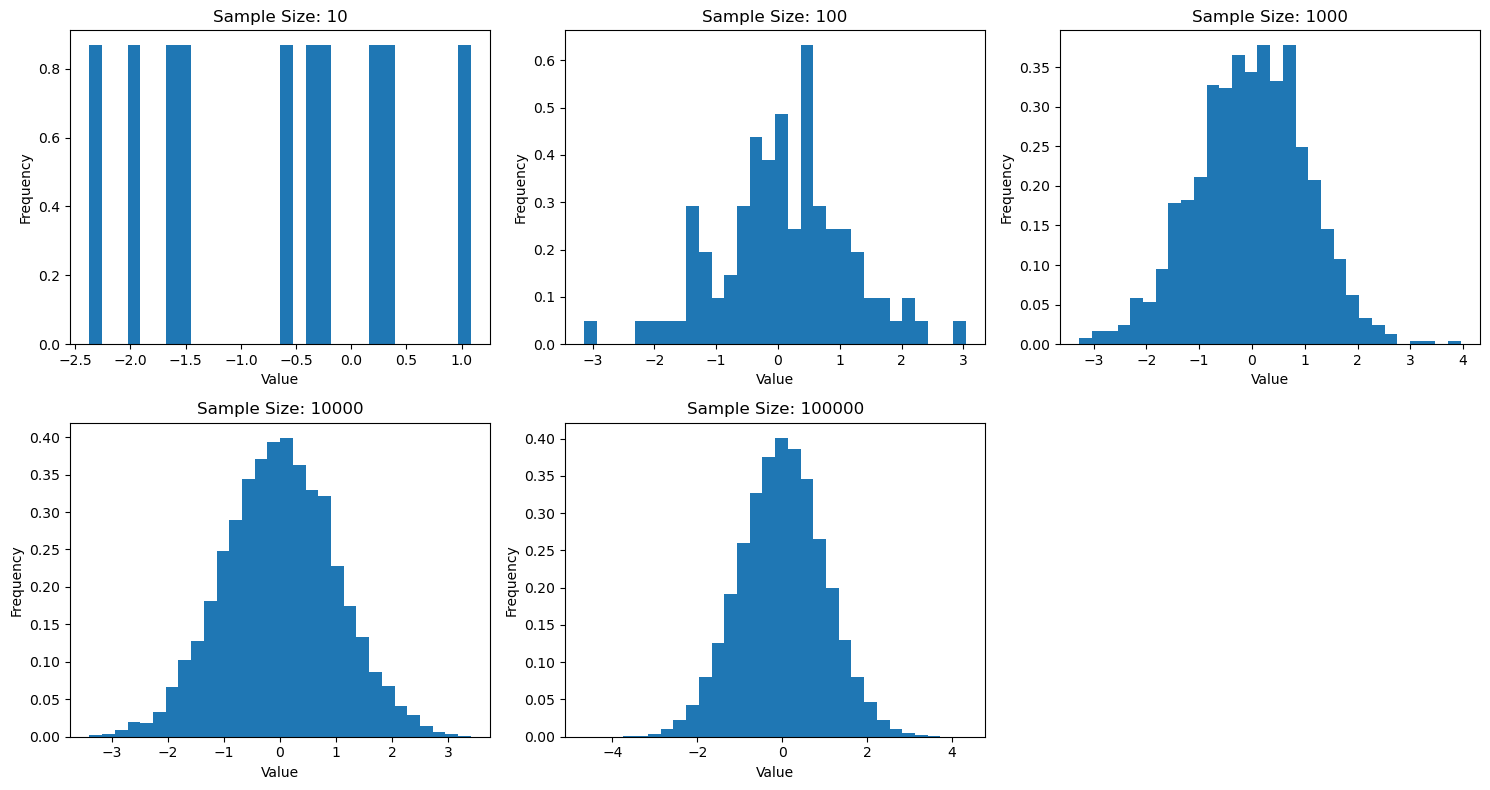

'--------------------Write your code above this line------------------------------'

In [11]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_samples(mu, sigma, N):
    u1 = np.random.uniform(0, 1, N)
    u2 = np.random.uniform(0, 1, N)

    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return mu + sigma * z0  

mu = 0
sigma = 1

sample_sizes = [10, 100, 1000, 10000, 100000]

plt.figure(figsize=(15, 8))
for i, N in enumerate(sample_sizes, 1):
    samples = generate_gaussian_samples(mu, sigma, N)
    plt.subplot(2, 3, i)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Sample Size: {N}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2\beta=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





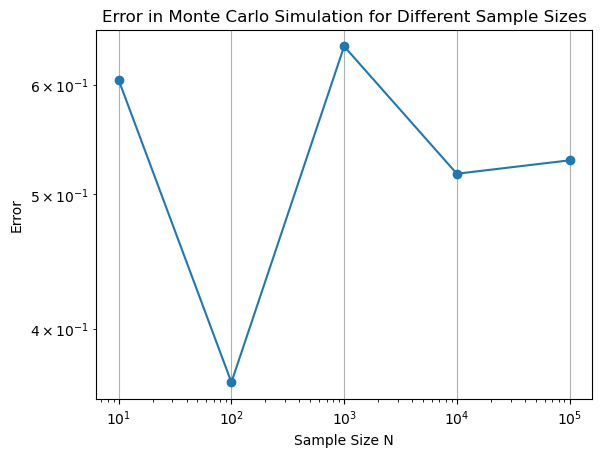

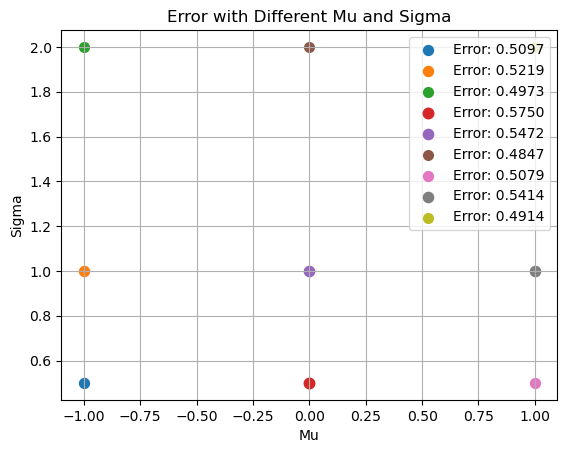

'--------------------Write your code above this line------------------------------'

In [16]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_ellipsoid_surface_area(N, beta, c):
    theta = np.random.uniform(0, np.pi, N)
    phi = np.random.uniform(0, 2 * np.pi, N)
    integrand_values = integrand(theta, phi, beta, c)
    average_value = np.mean(integrand_values)
    area_parameter_space = 2 * np.pi * np.pi  # Area of theta-phi space
    return average_value * area_parameter_space

beta = 0.5
c = 1

def integrand(theta, phi, beta, c):
    dx_dtheta = beta * np.cos(theta) * np.cos(phi)
    dy_dtheta = beta * np.cos(theta) * np.sin(phi)
    dz_dtheta = -c * np.sin(theta)

    dx_dphi = -beta * np.sin(theta) * np.sin(phi)
    dy_dphi = beta * np.sin(theta) * np.cos(phi)
    dz_dphi = 0

    E = dx_dtheta**2 + dy_dtheta**2 + dz_dtheta**2
    F = dx_dtheta * dx_dphi + dy_dtheta * dy_dphi + dz_dtheta * dz_dphi
    G = dx_dphi**2 + dy_dphi**2 + dz_dphi**2

    return np.sqrt(E * G - F**2)

mu = 0
sigma = 1
sample_sizes = [10, 100, 1000, 10000, 100000]
errors = []

def theoretical_area_ellipsoid(beta, c):
    e = np.sqrt(1 - beta**2 / c**2)
    return 2 * np.pi * beta**2 * (1 + (c / beta) * np.arcsin(e))

for N in sample_sizes:
    approx_value = monte_carlo_ellipsoid_surface_area(N, beta, c)
    exact_value = theoretical_area_ellipsoid(beta, c)
    error = np.abs(approx_value - exact_value)
    errors.append(error)

plt.plot(sample_sizes, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size N')
plt.ylabel('Error')
plt.title('Error in Monte Carlo Simulation for Different Sample Sizes')
plt.grid(True)
plt.show()

N = 10000
mu_values = [-1, 0, 1]  
sigma_values = [0.5, 1, 2]  
errors_mu_sigma = []

for mu in mu_values:
    for sigma in sigma_values:
        approx_value = monte_carlo_ellipsoid_surface_area(N, beta, c)
        exact_value = theoretical_area_ellipsoid(beta, c)
        error = np.abs(approx_value - exact_value)
        errors_mu_sigma.append((mu, sigma, error))

for mu, sigma, error in errors_mu_sigma:
    plt.scatter(mu, sigma, s=100*error, label=f'Error: {error:.4f}')
plt.xlabel('Mu')
plt.ylabel('Sigma')
plt.title('Error with Different Mu and Sigma')
plt.legend()
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

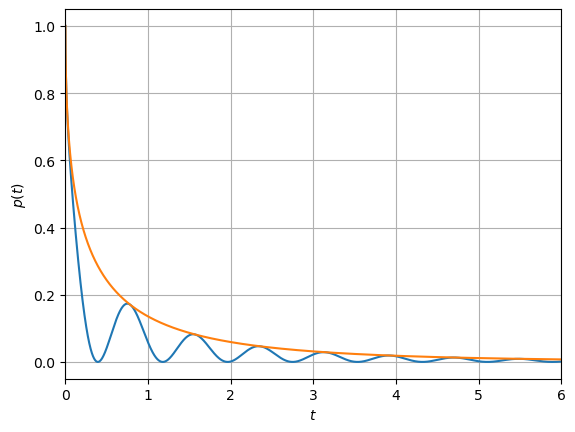

In [23]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



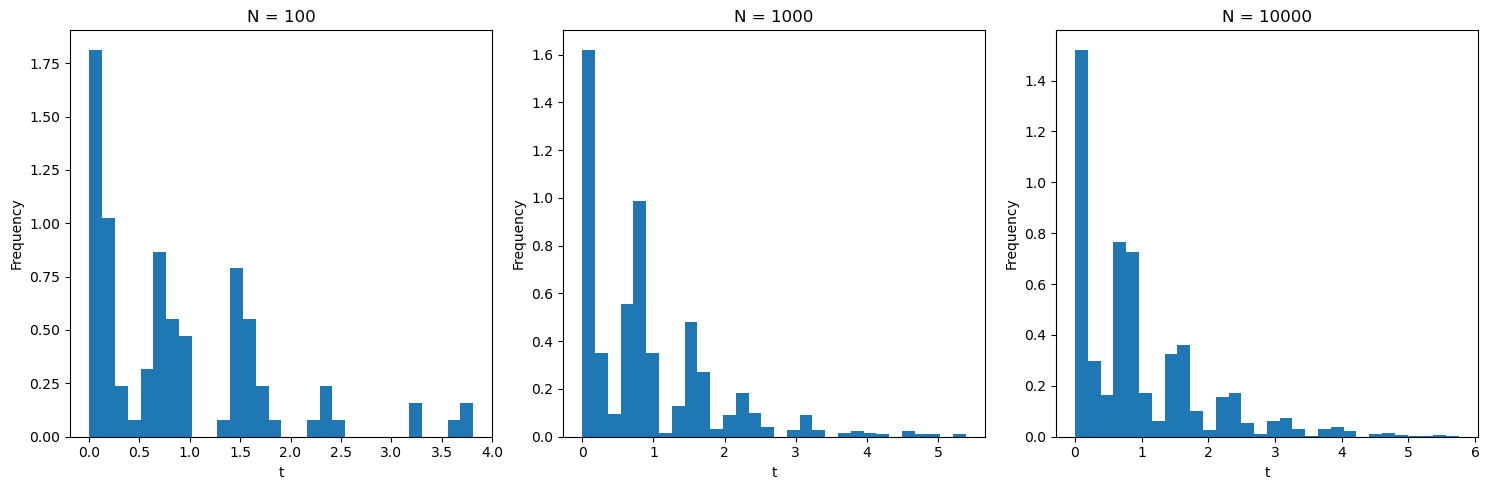

'--------------------Write your code above this line------------------------------'

In [1]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
def rejection_sampling(N, a=4, b=1, tf=6, M=1):
    samples = []
    while len(samples) < N:
        t = np.random.uniform(0, tf)
        accept_prob = np.exp(-b * t) * np.cos(a * t)**2 / M
        u = np.random.uniform(0, 1)
        if u <= accept_prob:
            samples.append(t)

    return np.array(samples)

Ns = [100, 1000, 10000]

plt.figure(figsize=(15, 5))
for i, N in enumerate(Ns):
    samples = rejection_sampling(N)
    plt.subplot(1, 3, i + 1)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'N = {N}')
    plt.xlabel('t')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


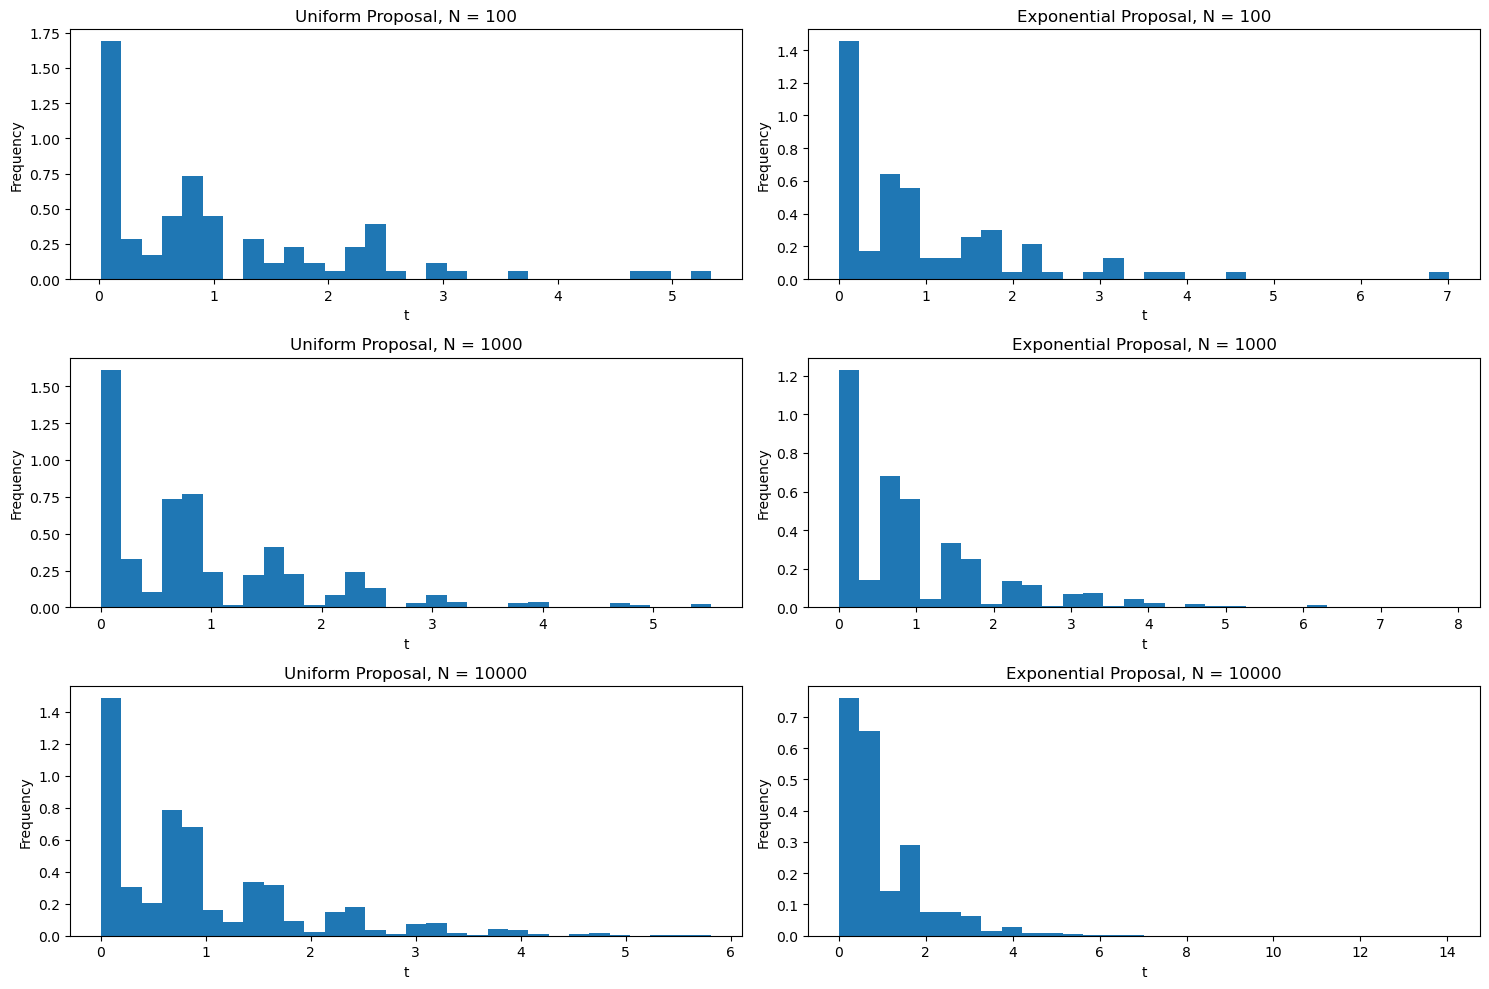

'--------------------Write your code above this line------------------------------'

In [3]:
'''--------------------Write your code below this line------------------------------'''
def rejection_sampling_exponential(N, a=4, b=1, M=1):
    samples = []
    while len(samples) < N:
        t = np.random.exponential(1)
        accept_prob = np.exp(-b * t) * np.cos(a * t)**2 / (M * np.exp(-t))
        u = np.random.uniform(0, 1)
        # Accept or reject the sample
        if u <= accept_prob:
            samples.append(t)

    return np.array(samples)

plt.figure(figsize=(15, 10))

for i, N in enumerate(Ns):
    samples_uniform = rejection_sampling(N)
    plt.subplot(3, 2, 2 * i + 1)
    plt.hist(samples_uniform, bins=30, density=True)
    plt.title(f'Uniform Proposal, N = {N}')
    plt.xlabel('t')
    plt.ylabel('Frequency')

    samples_exponential = rejection_sampling_exponential(N)
    plt.subplot(3, 2, 2 * i + 2)
    plt.hist(samples_exponential, bins=30, density=True)
    plt.title(f'Exponential Proposal, N = {N}')
    plt.xlabel('t')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

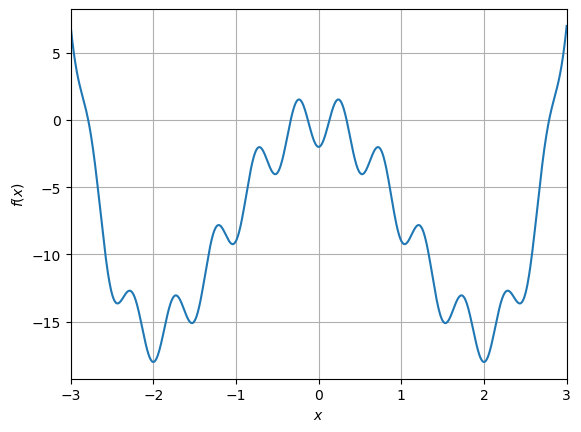

In [3]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [13]:
import os
import cv2

def gradient_descent(theta0, alpha=0.01, max_iters=100, tolerance=1e-6):
    def H_prime(theta):
        return 4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta)

    theta = theta0
    history = [theta] 

    for _ in range(max_iters):
        gradient = H_prime(theta)
        theta_next = theta - alpha * gradient

        history.append(theta_next)

        if abs(theta_next - theta) < tolerance:
            break

        theta = theta_next

    return theta, history

initial_guesses = [-1, 0.5, 3]

folder = 'PartA/gradient_descent_images'
os.makedirs(folder, exist_ok=True)

theta_min, history = gradient_descent(initial_guesses[0])

image_paths = []  
for i, theta in enumerate(history):
    plt.figure()
    plt.plot(x, y, label='$H(\\theta)$')
    plt.scatter(theta, theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta), color='red')  # Plot red dot at current theta
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(min(y), max(y))
    plt.xlabel('$\\theta$')
    plt.ylabel('$H(\\theta)$')
    plt.title(f'Gradient Descent at step {i}')

    img_path = os.path.join(folder, f'gd_step_{i}.png')
    plt.savefig(img_path)
    plt.close()
    image_paths.append(img_path)

(theta_min, image_paths)



(-1.0478413339093724,
 ['PartA/gradient_descent_images/gd_step_0.png',
  'PartA/gradient_descent_images/gd_step_1.png',
  'PartA/gradient_descent_images/gd_step_2.png',
  'PartA/gradient_descent_images/gd_step_3.png',
  'PartA/gradient_descent_images/gd_step_4.png',
  'PartA/gradient_descent_images/gd_step_5.png',
  'PartA/gradient_descent_images/gd_step_6.png',
  'PartA/gradient_descent_images/gd_step_7.png',
  'PartA/gradient_descent_images/gd_step_8.png',
  'PartA/gradient_descent_images/gd_step_9.png',
  'PartA/gradient_descent_images/gd_step_10.png',
  'PartA/gradient_descent_images/gd_step_11.png',
  'PartA/gradient_descent_images/gd_step_12.png',
  'PartA/gradient_descent_images/gd_step_13.png',
  'PartA/gradient_descent_images/gd_step_14.png',
  'PartA/gradient_descent_images/gd_step_15.png',
  'PartA/gradient_descent_images/gd_step_16.png',
  'PartA/gradient_descent_images/gd_step_17.png',
  'PartA/gradient_descent_images/gd_step_18.png',
  'PartA/gradient_descent_images/gd_st

In [36]:
import cv2
import os

image_folder = 'PartA/gradient_descent_images'
video_name = 'gradient_descent_video_1.avi'

image_files = [img for img in os.listdir(image_folder) if img.endswith(".png")]
image_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))  # Sort the images by step number

if not image_files:
    print("No images found in the directory.")
    exit()

first_image_path = os.path.join(image_folder, image_files[0])
frame = cv2.imread(first_image_path)

if frame is None:
    print(f"Failed to read the first image from {first_image_path}.")
    exit()

height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 10, (width, height))

for image in image_files:
    img_path = os.path.join(image_folder, image)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"Failed to read image from {img_path}.")
        continue

    video.write(img)

# Release VideoWriter
video.release()
cv2.destroyAllWindows()



In [35]:
import os
import cv2

def gradient_descent(theta0, alpha=0.01, max_iters=100, tolerance=1e-6):
    def H_prime(theta):
        return 4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta)

    theta = theta0
    history = [theta] 

    for _ in range(max_iters):
        gradient = H_prime(theta)
        theta_next = theta - alpha * gradient

        history.append(theta_next)

        if abs(theta_next - theta) < tolerance:
            break

        theta = theta_next

    return theta, history

initial_guesses = [-1, 0.5, 3]

folder = 'PartA/gradient_descent_images_2'
os.makedirs(folder, exist_ok=True)

theta_min, history = gradient_descent(initial_guesses[1])

image_paths = []  
for i, theta in enumerate(history):
    plt.figure()
    plt.plot(x, y, label='$H(\\theta)$')
    plt.scatter(theta, theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta), color='red')  # Plot red dot at current theta
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(min(y), max(y))
    plt.xlabel('$\\theta$')
    plt.ylabel('$H(\\theta)$')
    plt.title(f'Gradient Descent at step {i}')

    img_path = os.path.join(folder, f'gd_step_{i}.png')
    plt.savefig(img_path)
    plt.close()
    image_paths.append(img_path)

(theta_min, image_paths)

(0.605215149144021,
 ['PartA/gradient_descent_images_2/gd_step_0.png',
  'PartA/gradient_descent_images_2/gd_step_1.png',
  'PartA/gradient_descent_images_2/gd_step_2.png',
  'PartA/gradient_descent_images_2/gd_step_3.png',
  'PartA/gradient_descent_images_2/gd_step_4.png',
  'PartA/gradient_descent_images_2/gd_step_5.png',
  'PartA/gradient_descent_images_2/gd_step_6.png',
  'PartA/gradient_descent_images_2/gd_step_7.png',
  'PartA/gradient_descent_images_2/gd_step_8.png',
  'PartA/gradient_descent_images_2/gd_step_9.png',
  'PartA/gradient_descent_images_2/gd_step_10.png',
  'PartA/gradient_descent_images_2/gd_step_11.png',
  'PartA/gradient_descent_images_2/gd_step_12.png',
  'PartA/gradient_descent_images_2/gd_step_13.png',
  'PartA/gradient_descent_images_2/gd_step_14.png',
  'PartA/gradient_descent_images_2/gd_step_15.png',
  'PartA/gradient_descent_images_2/gd_step_16.png',
  'PartA/gradient_descent_images_2/gd_step_17.png',
  'PartA/gradient_descent_images_2/gd_step_18.png',
  

In [37]:
import cv2
import os

image_folder = 'PartA/gradient_descent_images_2'
video_name = 'gradient_descent_video_0_5.avi'

image_files = [img for img in os.listdir(image_folder) if img.endswith(".png")]
image_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))  # Sort the images by step number

if not image_files:
    print("No images found in the directory.")
    exit()

first_image_path = os.path.join(image_folder, image_files[0])
frame = cv2.imread(first_image_path)

if frame is None:
    print(f"Failed to read the first image from {first_image_path}.")
    exit()

height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 10, (width, height))

for image in image_files:
    img_path = os.path.join(image_folder, image)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image from {img_path}.")
        continue

    video.write(img)

video.release()
cv2.destroyAllWindows()



In [38]:
import os
import cv2

def gradient_descent(theta0, alpha=0.01, max_iters=100, tolerance=1e-6):
    def H_prime(theta):
        return 4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta)

    theta = theta0
    history = [theta] 
    for _ in range(max_iters):
        gradient = H_prime(theta)
        theta_next = theta - alpha * gradient

        history.append(theta_next)

        if abs(theta_next - theta) < tolerance:
            break

        theta = theta_next

    return theta, history

initial_guesses = [-1, 0.5, 3]

folder = 'PartA/gradient_descent_images_3'
os.makedirs(folder, exist_ok=True)

theta_min, history = gradient_descent(initial_guesses[2])

image_paths = []  
for i, theta in enumerate(history):
    plt.figure()
    plt.plot(x, y, label='$H(\\theta)$')
    plt.scatter(theta, theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta), color='red')  # Plot red dot at current theta
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(min(y), max(y))
    plt.xlabel('$\\theta$')
    plt.ylabel('$H(\\theta)$')
    plt.title(f'Gradient Descent at step {i}')

    img_path = os.path.join(folder, f'gd_step_{i}.png')
    plt.savefig(img_path)
    plt.close()
    image_paths.append(img_path)

(theta_min, image_paths)

(2.4641772755775304,
 ['PartA/gradient_descent_images_3/gd_step_0.png',
  'PartA/gradient_descent_images_3/gd_step_1.png',
  'PartA/gradient_descent_images_3/gd_step_2.png',
  'PartA/gradient_descent_images_3/gd_step_3.png',
  'PartA/gradient_descent_images_3/gd_step_4.png',
  'PartA/gradient_descent_images_3/gd_step_5.png',
  'PartA/gradient_descent_images_3/gd_step_6.png',
  'PartA/gradient_descent_images_3/gd_step_7.png',
  'PartA/gradient_descent_images_3/gd_step_8.png',
  'PartA/gradient_descent_images_3/gd_step_9.png',
  'PartA/gradient_descent_images_3/gd_step_10.png',
  'PartA/gradient_descent_images_3/gd_step_11.png',
  'PartA/gradient_descent_images_3/gd_step_12.png',
  'PartA/gradient_descent_images_3/gd_step_13.png',
  'PartA/gradient_descent_images_3/gd_step_14.png',
  'PartA/gradient_descent_images_3/gd_step_15.png',
  'PartA/gradient_descent_images_3/gd_step_16.png',
  'PartA/gradient_descent_images_3/gd_step_17.png',
  'PartA/gradient_descent_images_3/gd_step_18.png',
 

In [39]:
import cv2
import os

image_folder = 'PartA/gradient_descent_images_3'
video_name = 'gradient_descent_video_3.avi'

image_files = [img for img in os.listdir(image_folder) if img.endswith(".png")]
image_files.sort(key=lambda x: int(x.split('_')[2].split('.')[0]))  # Sort the images by step number

if not image_files:
    print("No images found in the directory.")

first_image_path = os.path.join(image_folder, image_files[0])
frame = cv2.imread(first_image_path)

if frame is None:
    print(f"Failed to read the first image from {first_image_path}.")
    exit()

height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 10, (width, height))

for image in image_files:
    img_path = os.path.join(image_folder, image)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Failed to read image from {img_path}.")
        continue

    video.write(img)

video.release()
cv2.destroyAllWindows()



<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

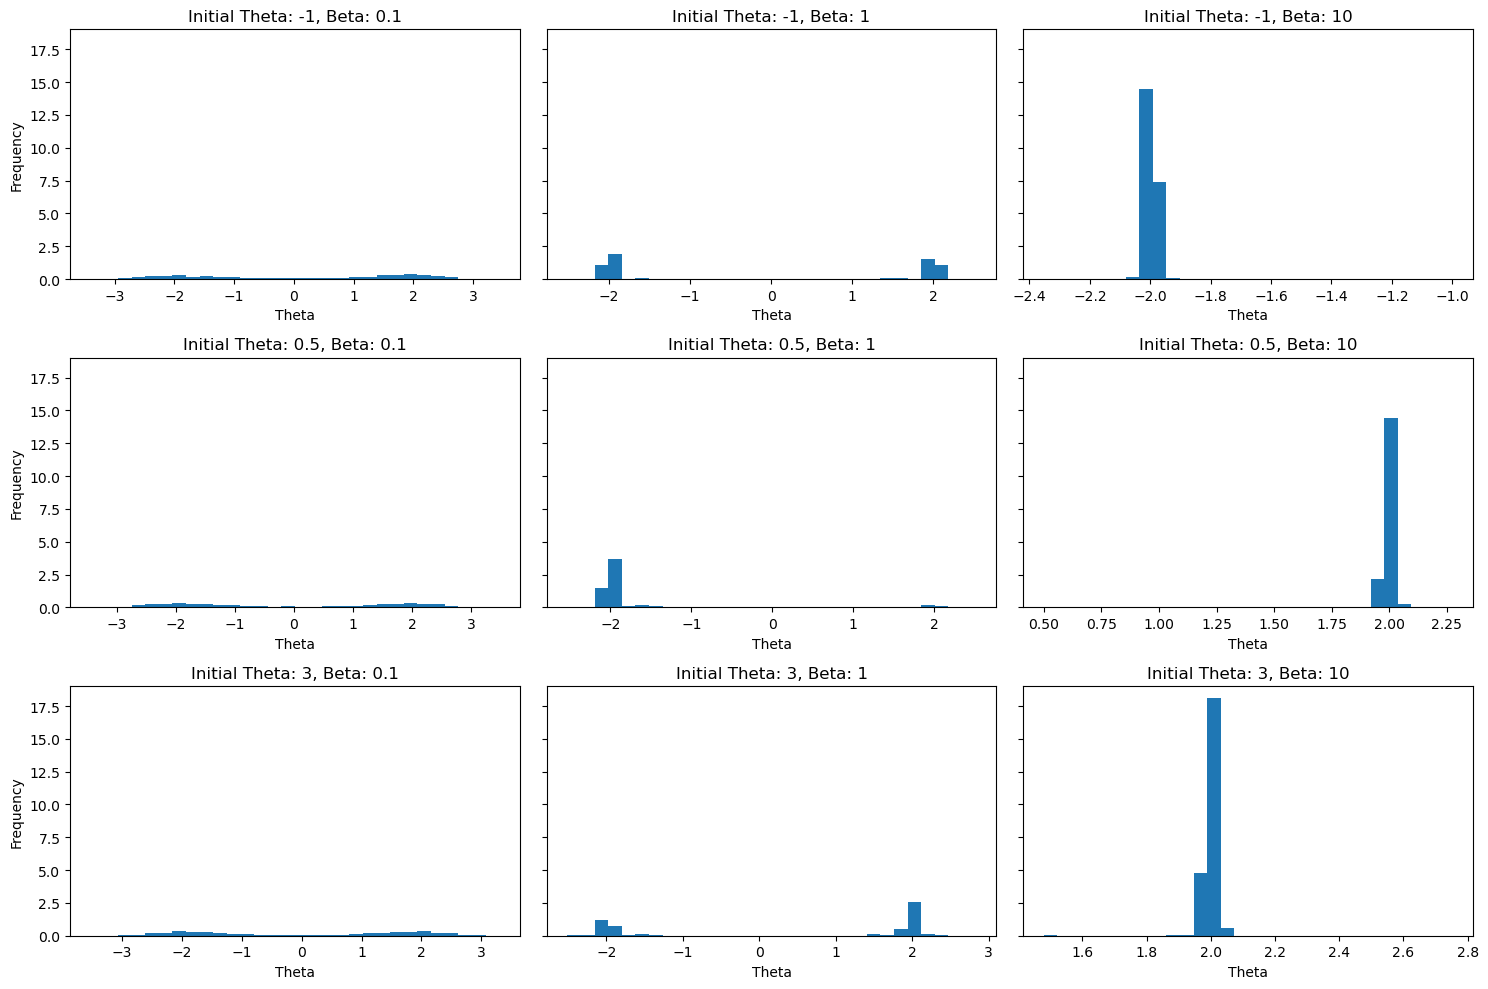

'--------------------Write your code above this line------------------------------'

In [41]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
def H(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

def metropolis_hastings(initial_theta, beta, steps=10000, sigma=1.0):
    theta = initial_theta
    samples = []
    for _ in range(steps):
        theta_star = theta + np.random.normal(0, sigma)

        delta_H = H(theta_star) - H(theta)
        r = np.exp(-beta * delta_H)

        if r > np.random.rand():
            theta = theta_star

        samples.append(theta)
    return np.array(samples)

initial_guesses = [-1, 0.5, 3]
betas = [0.1, 1, 10]

results = {}
for theta0 in initial_guesses:
    for beta in betas:
        key = f"Theta0: {theta0}, Beta: {beta}"
        results[key] = metropolis_hastings(theta0, beta)

results.keys()
fig, axes = plt.subplots(len(initial_guesses), len(betas), figsize=(15, 10), sharey=True)

for i, theta0 in enumerate(initial_guesses):
    for j, beta in enumerate(betas):
        key = f"Theta0: {theta0}, Beta: {beta}"
        ax = axes[i, j]
        ax.hist(results[key], bins=30, density=True)
        ax.set_title(f'Initial Theta: {theta0}, Beta: {beta}')
        ax.set_xlabel('Theta')
        if j == 0:
            ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

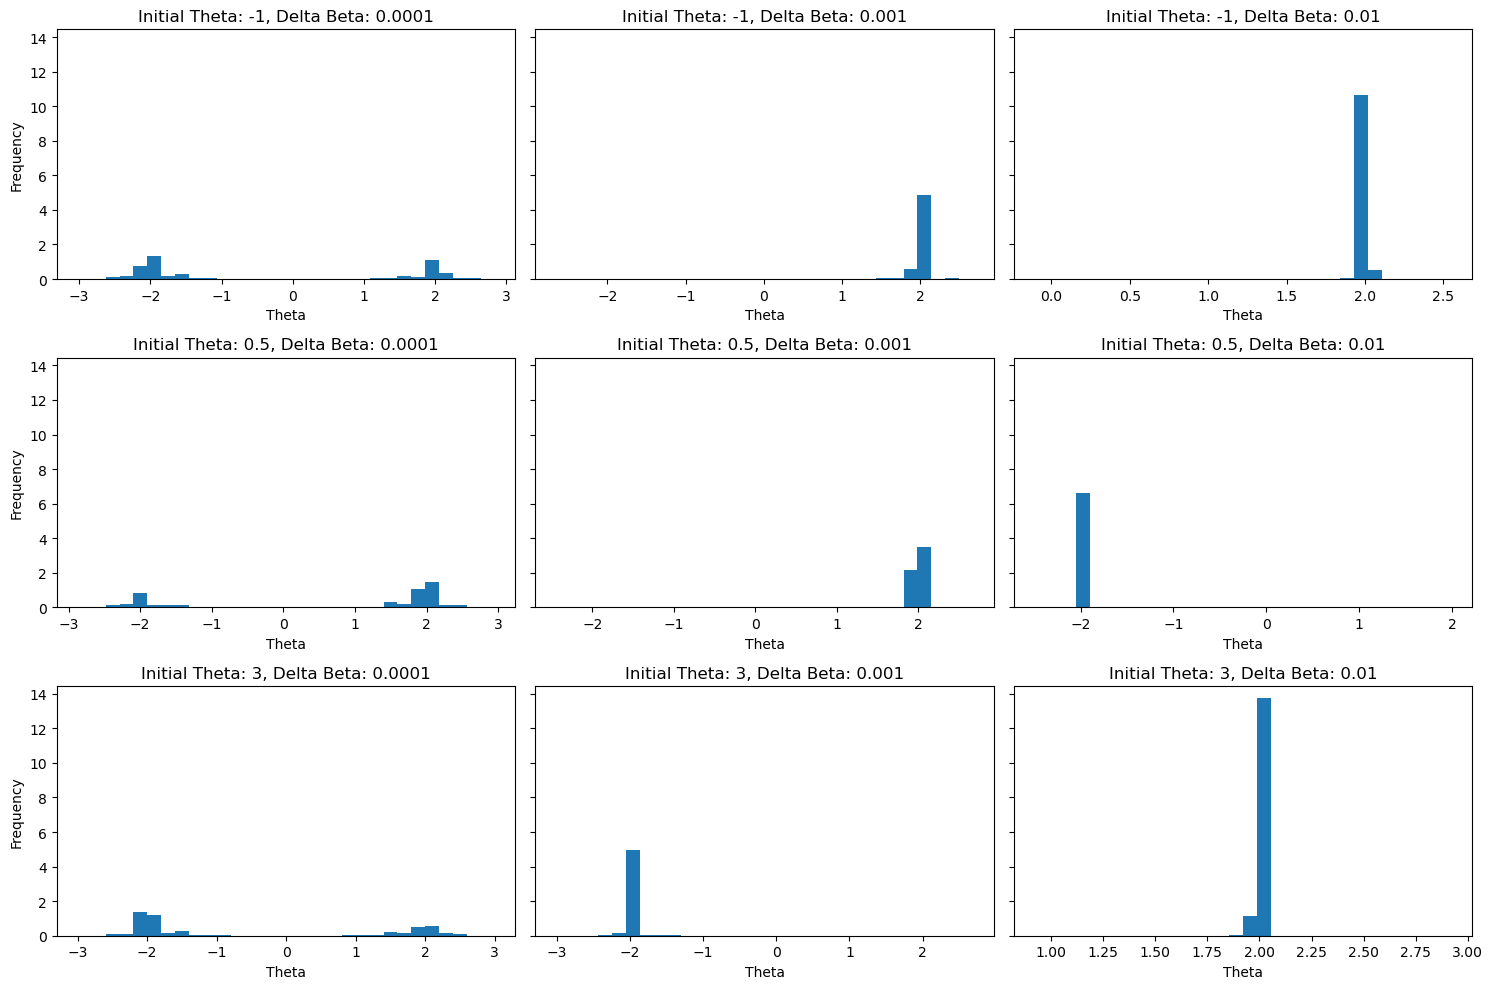

'--------------------Write your code above this line------------------------------'

In [42]:


'''--------------------Write your code below this line------------------------------'''
def simulated_annealing(initial_theta, initial_beta, delta_beta, steps=10000, sigma=1.0):
    theta = initial_theta
    beta = initial_beta
    samples = []

    for _ in range(steps):

        theta_star = theta + np.random.normal(0, sigma)

        delta_H = H(theta_star) - H(theta)
        r = np.exp(-beta * delta_H)

        if r > np.random.rand():
            theta = theta_star

        samples.append(theta)
        beta += delta_beta  

    return np.array(samples)

delta_betas = [0.0001, 0.001, 0.01]

sa_results = {}
for theta0 in initial_guesses:
    for delta_beta in delta_betas:
        key = f"Theta0: {theta0}, Delta Beta: {delta_beta}"
        sa_results[key] = simulated_annealing(theta0, initial_beta=0.1, delta_beta=delta_beta)

fig, axes = plt.subplots(len(initial_guesses), len(delta_betas), figsize=(15, 10), sharey=True)

for i, theta0 in enumerate(initial_guesses):
    for j, delta_beta in enumerate(delta_betas):
        key = f"Theta0: {theta0}, Delta Beta: {delta_beta}"
        ax = axes[i, j]
        ax.hist(sa_results[key], bins=30, density=True)
        ax.set_title(f'Initial Theta: {theta0}, Delta Beta: {delta_beta}')
        ax.set_xlabel('Theta')
        if j == 0:
            ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''